<a href="https://colab.research.google.com/github/Rishabh-Sarpal/Formula1-Random-Forest-Classifier-/blob/main/Formula1_(Random_Forest_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
muhammadehsan02_formula_1_world_championship_history_1950_2024_path = kagglehub.dataset_download('muhammadehsan02/formula-1-world-championship-history-1950-2024')

print('Data source import complete.')


Data source import complete.


In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-world-championship-history-1950-2024/Constructor_Performance.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Race_Schedule.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Team_Details.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Race_Results.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Driver_Details.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Track_Information.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Season_Summaries.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Race_Status.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Constructor_Rankings.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Lap_Timings.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Sprint_Race_Results.csv
/kaggle/input/formula-1-world-championship-history-1950-2024/Driver_Rankings.csv
/kaggle/input/formula-1-w

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load all CSV files


In [15]:
constructor_performance = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Constructor_Performance.csv")
constructor_rankings = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Constructor_Rankings.csv")
driver_details = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Driver_Details.csv")
driver_rankings = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Driver_Rankings.csv")
lap_timings = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Lap_Timings.csv")
pit_stop_records = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Pit_Stop_Records.csv")
qualifying_results = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Qualifying_Results.csv")
race_results = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Race_Results.csv")
race_schedule = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Race_Schedule.csv")
race_status = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Race_Status.csv")
season_summaries = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Season_Summaries.csv")
sprint_race_results = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Sprint_Race_Results.csv")
team_details = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Team_Details.csv")
track_information = pd.read_csv(f"{muhammadehsan02_formula_1_world_championship_history_1950_2024_path}/Track_Information.csv")

# Merge datasets
# Merge race_results with other tables on common columns and handle duplicate column names
combined_df = race_results.merge(driver_details, on='driverId', how='left') \
                          .merge(constructor_performance, on=['constructorId', 'raceId'], how='left', suffixes=('', '_constructor_perf')) \
                          .merge(constructor_rankings, on=['constructorId', 'raceId'], how='left', suffixes=('', '_constructor_rank')) \
                          .merge(driver_rankings, on=['driverId', 'raceId'], how='left', suffixes=('', '_driver_rank')) \
                          .merge(lap_timings, on=['driverId', 'raceId'], how='left', suffixes=('', '_lap_timing')) \
                          .merge(pit_stop_records, on=['driverId', 'raceId'], how='left', suffixes=('', '_pit_stop')) \
                          .merge(qualifying_results, on=['driverId', 'constructorId', 'raceId'], how='left', suffixes=('', '_qualifying')) \
                          .merge(race_schedule, on='raceId', how='left', suffixes=('', '_schedule')) \
                          .merge(race_status, on='statusId', how='left', suffixes=('', '_status')) \
                          .merge(season_summaries, on='year', how='left', suffixes=('', '_season')) \
                          .merge(sprint_race_results, on=['resultId', 'raceId', 'driverId', 'constructorId'], how='left', suffixes=('', '_sprint')) \
                          .merge(team_details, on='constructorId', how='left', suffixes=('', '_team')) \
                          .merge(track_information, on='circuitId', how='left', suffixes=('', '_track'))

# Save combined data into a single CSV
#combined_df.to_csv('/kaggle/working/combined_f1_data.csv', index=False)

# Check the first few rows of the combined data
print(combined_df.head())

   resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1         1      18         1              1       22     1        1   
2         1      18         1              1       22     1        1   
3         1      18         1              1       22     1        1   
4         1      18         1              1       22     1        1   

  positionText  positionOrder  points  ...  nationality_team  \
0            1              1    10.0  ...           British   
1            1              1    10.0  ...           British   
2            1              1    10.0  ...           British   
3            1              1    10.0  ...           British   
4            1              1    10.0  ...           British   

                               url_team   circuitRef  \
0  http://en.wikipedia.org/wiki/McLaren  albert_park   
1  http://en.wikipedia.org/wiki/McLaren  albert_park   
2  http://en.w

In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920371 entries, 0 to 920370
Data columns (total 97 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   resultId                       920371 non-null  int64  
 1   raceId                         920371 non-null  int64  
 2   driverId                       920371 non-null  int64  
 3   constructorId                  920371 non-null  int64  
 4   number_x                       920371 non-null  object 
 5   grid                           920371 non-null  int64  
 6   position                       920371 non-null  object 
 7   positionText                   920371 non-null  object 
 8   positionOrder                  920371 non-null  int64  
 9   points                         920371 non-null  float64
 10  laps                           920371 non-null  int64  
 11  time                           920371 non-null  object 
 12  milliseconds                  

In [17]:
combined_df["number_x"]

,number_x
0,22
1,22
2,22
3,22
4,22
...,...
920366,24
920367,24
920368,24
920369,63


In [18]:
combined_df["number_x"] = pd.to_numeric(combined_df["number_x"], errors='coerce').fillna(0).astype(int)


In [19]:
combined_df["position"]

,position
0,1
1,1
2,1
3,1
4,1
...,...
920366,18
920367,18
920368,18
920369,\N


In [20]:
combined_df["position"] = pd.to_numeric(combined_df["position"], errors='coerce').fillna(0).astype(int)


In [21]:
combined_df["positionText"]

,positionText
0,1
1,1
2,1
3,1
4,1
...,...
920366,18
920367,18
920368,18
920369,R


In [22]:

non_numeric_mapping = {
    'R': -1,   # Retired
    'D': -2,   # Disqualified
    'F': -3,   # Failed to Finish
    'N': -4,   # Not Classified
    'W': -5,   # Withdrawn
    'E': -6    # Excluded (You can adjust these mappings as needed)
}

# Replace non-numeric values in positionText with the defined mapping
combined_df['positionText'] = combined_df['positionText'].replace(non_numeric_mapping)

# Convert positionText to numeric, handling errors and non-numeric cases
combined_df['positionText'] = pd.to_numeric(combined_df['positionText'], errors='coerce').fillna(0).astype(int)

# Verify the conversion
print(combined_df['positionText'].dtype)
print(combined_df['positionText'].value_counts())


int64
positionText
-1     83944
 4     50648
 5     49798
 3     49783
 6     49249
 9     49046
 1     48891
 2     48866
 7     48865
 10    48100
 8     48079
 11    47602
 12    46676
 13    45475
 14    43262
 15    41039
 16    35885
 17    30127
 18    21611
 19    14612
 20     7169
 21     3440
-2      2769
 22     1932
-3      1368
-4       754
 23      656
-5       334
-6       218
 24      164
 25        1
 26        1
 27        1
 28        1
 29        1
 30        1
 31        1
 32        1
 33        1
Name: count, dtype: int64


In [23]:
combined_df['time']

,time
0,1:34:50.616
1,1:34:50.616
2,1:34:50.616
3,1:34:50.616
4,1:34:50.616
...,...
920366,\N
920367,\N
920368,\N
920369,\N


In [24]:
## Replace '\N' with NaN

## Convert the 'time' column to timedelta format (assuming format HH:MM:SS.SSS)

## Verify the conversion


In [25]:

combined_df['time'] = combined_df['time'].replace('\\N', np.nan)

combined_df['time'] = pd.to_timedelta(combined_df['time'], errors='coerce')

print(combined_df['time'].head())
print(combined_df['time'].dtype)

0   0 days 01:34:50.616000
1   0 days 01:34:50.616000
2   0 days 01:34:50.616000
3   0 days 01:34:50.616000
4   0 days 01:34:50.616000
Name: time, dtype: timedelta64[ns]
timedelta64[ns]


In [26]:
combined_df['milliseconds']

,milliseconds
0,5690616
1,5690616
2,5690616
3,5690616
4,5690616
...,...
920366,\N
920367,\N
920368,\N
920369,\N


## Replace '\N' with NaN

## Convert the 'milliseconds' column to float (to handle NaN), and then to integer if necessary

## Check the conversion



In [27]:
combined_df['milliseconds'] = combined_df['milliseconds'].replace('\\N', np.nan)

combined_df['milliseconds'] = pd.to_numeric(combined_df['milliseconds'], errors='coerce')

print(combined_df['milliseconds'].head())
print(combined_df['milliseconds'].dtype)

0    5690616.0
1    5690616.0
2    5690616.0
3    5690616.0
4    5690616.0
Name: milliseconds, dtype: float64
float64


In [28]:
combined_df['fastestLap']

,fastestLap
0,39
1,39
2,39
3,39
4,39
...,...
920366,43
920367,43
920368,43
920369,3


In [29]:
combined_df['fastestLap'] = combined_df['fastestLap'].replace('\\N', np.nan)

combined_df['fastestLap'] = pd.to_numeric(combined_df['fastestLap'], errors='coerce')

In [30]:
combined_df['rank'] = combined_df['rank'].replace('\\N', np.nan)

combined_df['rank'] = pd.to_numeric(combined_df['rank'], errors='coerce')


In [31]:
combined_df['fastestLapTime'].isnull().mean() * 100

np.float64(0.0)

## Verify the conversion


In [32]:
combined_df['fastestLapTime'] = combined_df['fastestLapTime'].replace('\\N', np.nan)

combined_df['fastestLapTime'] = pd.to_timedelta(combined_df['fastestLapTime'], errors='coerce')

print(combined_df['fastestLapTime'].head())
print(combined_df['fastestLapTime'].dtype)

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: fastestLapTime, dtype: timedelta64[ns]
timedelta64[ns]


## Replace '\\N' with np.nan


## Get columns with null values

## Display columns with null values


In [33]:

combined_df.replace(np.nan, np.nan, inplace=True)

null_columns = combined_df.isnull().mean() *100
null_columns = null_columns[null_columns > 0]

print(null_columns)

/tmp/ipython-input-209983711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df.replace(np.nan, np.nan, inplace=True)


time                              94.688229
milliseconds                      46.906302
fastestLap                        16.339063
rank                              16.076343
fastestLapTime                   100.000000
constructorResultsId               0.175038
points_constructor_perf            0.175038
status                             0.175038
constructorStandingsId             0.426024
points_constructor_rank            0.426024
position_constructor_rank          0.426024
positionText_constructor_rank      0.426024
wins                               0.426024
driverStandingsId                  0.678422
points_driver_rank                 0.678422
position_driver_rank               0.678422
positionText_driver_rank           0.678422
wins_driver_rank                   0.678422
lap                                1.711918
position_lap_timing                1.711918
time_lap_timing                    1.711918
milliseconds_lap_timing            1.711918
stop                            

## Load the combined dataset (assuming it's already loaded as combined_df)
## combined_df = pd.read_csv('/path/to/your/combined_f1_data.csv')
## Replace '\\N' with NaN
## Calculate the percentage of missing values for each column
## Filter out columns with more than 35% missing values
## Create a new DataFrame with the columns that have less than or equal to 35% missing values
## Optionally, save the cleaned DataFrame to a new CSV file
## cleaned_df.to_csv('/path/to/your/cleaned_f1_data.csv', index=False)

## Print the columns that were dropped and the remaining columns

In [34]:
combined_df.replace('\\N', np.nan, inplace=True)

missing_percentage = combined_df.isnull().mean() * 100

columns_to_drop = missing_percentage[missing_percentage > 35].index

cleaned_df = combined_df.drop(columns=columns_to_drop)
print(f"Columns dropped: {columns_to_drop.tolist()}")
print(f"Remaining columns: {cleaned_df.columns.tolist()}")

Columns dropped: ['time', 'milliseconds', 'fastestLapTime', 'status', 'q2', 'q3', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'number_sprint', 'grid_sprint', 'position_sprint', 'positionText_sprint', 'positionOrder_sprint', 'points_sprint', 'laps_sprint', 'time_sprint', 'milliseconds_sprint', 'fastestLap_sprint', 'fastestLapTime_sprint', 'statusId_sprint']
Remaining columns: ['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'fastestLap', 'rank', 'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code', 'forename', 'surname', 'dob', 'nationality', 'url', 'constructorResultsId', 'points_constructor_perf', 'constructorStandingsId', 'points_constructor_rank', 'position_constructor_rank', 'positionText_constructor_rank', 'wins', 'driverStandingsId', 'points_driver_rank', 'position_driver_rank', 'positionText_driver_r

In [35]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920371 entries, 0 to 920370
Data columns (total 69 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   resultId                       920371 non-null  int64  
 1   raceId                         920371 non-null  int64  
 2   driverId                       920371 non-null  int64  
 3   constructorId                  920371 non-null  int64  
 4   number_x                       920371 non-null  int64  
 5   grid                           920371 non-null  int64  
 6   position                       920371 non-null  int64  
 7   positionText                   920371 non-null  int64  
 8   positionOrder                  920371 non-null  int64  
 9   points                         920371 non-null  float64
 10  laps                           920371 non-null  int64  
 11  fastestLap                     769991 non-null  float64
 12  rank                          

## Remove the columns from the DataFrame

## Verify the remaining columns



In [36]:
columns_to_drop = [
    'resultId', 'raceId', 'driverId', 'constructorId', 'url', 'url_schedule',
    'url_team', 'constructorRef', 'name_team', 'nationality_team',
    'url_season', 'status_status', 'circuitRef', 'name_track', 'location',
    'country', 'lat', 'lng', 'alt', 'fastestLap', 'milliseconds', 'time',
    'status', 'number_y', 'code', 'forename', 'surname', 'dob', 'nationality',
    'url', 'driverRef', 'constructorResultsId', 'points_constructor_perf',
    'constructorStandingsId', 'points_constructor_rank', 'position_constructor_rank',
    'positionText_constructor_rank', 'wins', 'driverStandingsId',
    'points_driver_rank', 'position_driver_rank', 'positionText_driver_rank',
    'wins_driver_rank', 'time_schedule', 'url_schedule', 'status_status',
    'number_y', 'code', 'forename', 'surname', 'dob', 'nationality',
    'url', 'driverRef'
]

cleaned_df = combined_df.drop(columns=columns_to_drop, errors='ignore')

print(f"Remaining columns: {cleaned_df.columns.tolist()}")


Remaining columns: ['number_x', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'lap', 'position_lap_timing', 'time_lap_timing', 'milliseconds_lap_timing', 'stop', 'lap_pit_stop', 'time_pit_stop', 'duration', 'milliseconds_pit_stop', 'qualifyId', 'number', 'position_qualifying', 'q1', 'q2', 'q3', 'year', 'round', 'circuitId', 'name', 'date', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'number_sprint', 'grid_sprint', 'position_sprint', 'positionText_sprint', 'positionOrder_sprint', 'points_sprint', 'laps_sprint', 'time_sprint', 'milliseconds_sprint', 'fastestLap_sprint', 'fastestLapTime_sprint', 'statusId_sprint', 'url_track']


In [37]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920371 entries, 0 to 920370
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   number_x                 920371 non-null  int64          
 1   grid                     920371 non-null  int64          
 2   position                 920371 non-null  int64          
 3   positionText             920371 non-null  int64          
 4   positionOrder            920371 non-null  int64          
 5   points                   920371 non-null  float64        
 6   laps                     920371 non-null  int64          
 7   rank                     772409 non-null  float64        
 8   fastestLapTime           0 non-null       timedelta64[ns]
 9   fastestLapSpeed          769991 non-null  object         
 10  statusId                 920371 non-null  int64          
 11  lap                      904615 non-null  float64        
 12  po

In [38]:

## Assuming cleaned_df is your DataFrame after dropping unwanted columns

## Step 1: Identify columns with numeric types

## Step 2: Remove columns that are already integers or cannot be converted to integers

## Step 3: Handle NaN values before conversion
## Example: Fill NaN values with 0 (or another appropriate value) before converting to int

## Verify conversion


In [39]:
# Detect numeric columns
numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns.tolist()

# Identify columns where all non-null floats are actually integers
columns_to_convert = [
    col for col in numeric_cols
    if cleaned_df[col].dropna().apply(lambda x: x.is_integer() if isinstance(x, float) else True).all()
]

# Fill NaNs with 0 and convert to int safely
for col in columns_to_convert:
    cleaned_df[col] = cleaned_df[col].fillna(0).astype(int)

# Display data types after conversion
print(cleaned_df.dtypes)


/tmp/ipython-input-878505379.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df[col] = cleaned_df[col].fillna(0).astype(int)


number_x                     int64
grid                         int64
position                     int64
positionText                 int64
positionOrder                int64
points                     float64
laps                         int64
rank                         int64
fastestLapTime               int64
fastestLapSpeed             object
statusId                     int64
lap                          int64
position_lap_timing          int64
time_lap_timing             object
milliseconds_lap_timing      int64
stop                         int64
lap_pit_stop                 int64
time_pit_stop               object
duration                    object
milliseconds_pit_stop        int64
qualifyId                    int64
number                       int64
position_qualifying          int64
q1                          object
q2                          object
q3                          object
year                         int64
round                        int64
circuitId           

## Assuming cleaned_df is your DataFrame after conversion

## Check for any remaining null values

## Print columns with null values


In [40]:
null_summary = cleaned_df.isnull().mean() *100

print(null_summary[null_summary > 0])

fastestLapSpeed    16.339063
time_lap_timing     1.711918
time_pit_stop      31.167866
duration           31.167866
q1                 12.101424
q2                 41.119831
q3                 62.800001
fp1_date           81.129132
fp1_time           86.318995
fp2_date           81.129132
fp2_time           86.318995
fp3_date           85.420988
fp3_time           89.677967
quali_date         81.129132
quali_time         86.318995
sprint_date        95.708144
sprint_time        96.641028
dtype: float64


In [41]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920371 entries, 0 to 920370
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   number_x                 920371 non-null  int64  
 1   grid                     920371 non-null  int64  
 2   position                 920371 non-null  int64  
 3   positionText             920371 non-null  int64  
 4   positionOrder            920371 non-null  int64  
 5   points                   920371 non-null  float64
 6   laps                     920371 non-null  int64  
 7   rank                     920371 non-null  int64  
 8   fastestLapTime           920371 non-null  int64  
 9   fastestLapSpeed          769991 non-null  object 
 10  statusId                 920371 non-null  int64  
 11  lap                      920371 non-null  int64  
 12  position_lap_timing      920371 non-null  int64  
 13  time_lap_timing          904615 non-null  object 
 14  mill

## Drop columns with more than 35% null values


In [42]:
threshold = 35
columns_to_drop = null_summary[null_summary > threshold].index
cleaned_df.drop(columns=columns_to_drop, inplace=True)

In [43]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920371 entries, 0 to 920370
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   number_x                 920371 non-null  int64  
 1   grid                     920371 non-null  int64  
 2   position                 920371 non-null  int64  
 3   positionText             920371 non-null  int64  
 4   positionOrder            920371 non-null  int64  
 5   points                   920371 non-null  float64
 6   laps                     920371 non-null  int64  
 7   rank                     920371 non-null  int64  
 8   fastestLapTime           920371 non-null  int64  
 9   fastestLapSpeed          769991 non-null  object 
 10  statusId                 920371 non-null  int64  
 11  lap                      920371 non-null  int64  
 12  position_lap_timing      920371 non-null  int64  
 13  time_lap_timing          904615 non-null  object 
 14  mill

In [44]:
cleaned_df.drop(columns='url_track',inplace=True)

In [45]:
cleaned_df.drop(columns='name',inplace=True)

## Convert columns to numeric types if they are not already

## Impute missing values

## Verify imputation

In [46]:
import pandas as pd
import numpy as np

# Parse time in format 'm:ss.sss'
def parse_to_timedelta(value):
    try:
        if pd.isna(value):
            return np.nan
        minutes, seconds = value.split(':')
        total_seconds = int(minutes) * 60 + float(seconds)
        return pd.to_timedelta(total_seconds, unit='s')
    except:
        return np.nan

# Safe conversions if column exists
if 'fastestLapSpeed' in cleaned_df.columns:
    cleaned_df['fastestLapSpeed'] = pd.to_numeric(cleaned_df['fastestLapSpeed'], errors='coerce')
    cleaned_df['fastestLapSpeed'] = cleaned_df['fastestLapSpeed'].fillna(cleaned_df['fastestLapSpeed'].median())

if 'q1' in cleaned_df.columns:
    cleaned_df['q1'] = pd.to_numeric(cleaned_df['q1'], errors='coerce')
    cleaned_df['q1'] = cleaned_df['q1'].fillna(cleaned_df['q1'].median())

if 'duration' in cleaned_df.columns:
    cleaned_df['duration'] = pd.to_timedelta(cleaned_df['duration'], errors='coerce')
    cleaned_df['duration'] = cleaned_df['duration'].fillna(cleaned_df['duration'].median())

if 'time_lap_timing' in cleaned_df.columns:
    cleaned_df['time_lap_timing'] = cleaned_df['time_lap_timing'].apply(parse_to_timedelta)
    cleaned_df['time_lap_timing'] = cleaned_df['time_lap_timing'].fillna(cleaned_df['time_lap_timing'].median())

if 'time_pit_stop' in cleaned_df.columns:
    cleaned_df['time_pit_stop'] = cleaned_df['time_pit_stop'].apply(parse_to_timedelta)
    cleaned_df['time_pit_stop'] = cleaned_df['time_pit_stop'].fillna(cleaned_df['time_pit_stop'].median())

# Show any remaining nulls
print(cleaned_df.isnull().mean() * 100)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


number_x                     0.0
grid                         0.0
position                     0.0
positionText                 0.0
positionOrder                0.0
points                       0.0
laps                         0.0
rank                         0.0
fastestLapTime               0.0
fastestLapSpeed              0.0
statusId                     0.0
lap                          0.0
position_lap_timing          0.0
time_lap_timing              0.0
milliseconds_lap_timing      0.0
stop                         0.0
lap_pit_stop                 0.0
time_pit_stop              100.0
duration                   100.0
milliseconds_pit_stop        0.0
qualifyId                    0.0
number                       0.0
position_qualifying          0.0
q1                         100.0
year                         0.0
round                        0.0
circuitId                    0.0
date                         0.0
number_sprint                0.0
grid_sprint                  0.0
position_s

In [47]:
cleaned_df.drop(columns=['duration','q1'],inplace=True)

In [48]:
cleaned_df['date']

,date
0,2008-03-16
1,2008-03-16
2,2008-03-16
3,2008-03-16
4,2008-03-16
...,...
920366,2024-07-07
920367,2024-07-07
920368,2024-07-07
920369,2024-07-07


## Define a base date

## Convert date to number of days since base date

## Check for null values

In [49]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], errors='coerce')

base_date = pd.Timestamp('1970-01-01')

cleaned_df['date'] = (cleaned_df['date'] - base_date).dt.days

print(cleaned_df['date'].isnull().sum())

0


In [50]:
cleaned_df['position'].value_counts()

,count
position,
0,89498
4,50648
5,49798
3,49783
6,49249
9,49046
1,48891
2,48866
7,48865


In [51]:
def categorize_position(pos):
    if pos <= 3:
        return 'Top 3'
    elif pos <= 10:
        return 'Top 10'
    else:
        return 'Other'

cleaned_df['position_category'] = cleaned_df['position'].apply(categorize_position)

In [52]:
cleaned_df['position_category'].value_counts()

,count
position_category,
Top 10,343785
Other,339548
Top 3,237038


In [53]:
position_counts = cleaned_df['position'].value_counts()
high_freq = position_counts[position_counts > 50000].index
medium_freq = position_counts[(position_counts <= 50000) & (position_counts > 10000)].index
low_freq = position_counts[position_counts <= 10000].index

def bin_position(pos):
    if pos in high_freq:
        return 'High'
    elif pos in medium_freq:
        return 'Medium'
    else:
        return 'Low'

cleaned_df['position_bin'] = cleaned_df['position'].apply(bin_position)
cleaned_df['position_bin']

,position_bin
0,Medium
1,Medium
2,Medium
3,Medium
4,Medium
...,...
920366,Medium
920367,Medium
920368,Medium
920369,High


In [54]:
cleaned_df.drop(columns='position_category',inplace=True)

In [55]:
cleaned_df['position_bin'].value_counts()

,count
position_bin,
Medium,766855
High,140146
Low,13370


## Define the mapping for position_bin to integers

## Apply the mapping to create the integer column

## Drop the old column if desired

## Verify the conversion



In [56]:
position_bin_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

cleaned_df['position_bin_int'] = cleaned_df['position_bin'].map(position_bin_mapping)

cleaned_df.drop('position_bin', axis=1, inplace=True)

print(cleaned_df[['position_bin_int']].head())
print(cleaned_df.dtypes)

   position_bin_int
0                 1
1                 1
2                 1
3                 1
4                 1
number_x                             int64
grid                                 int64
position                             int64
positionText                         int64
positionOrder                        int64
points                             float64
laps                                 int64
rank                                 int64
fastestLapTime                       int64
fastestLapSpeed                    float64
statusId                             int64
lap                                  int64
position_lap_timing                  int64
time_lap_timing            timedelta64[ns]
milliseconds_lap_timing              int64
stop                                 int64
lap_pit_stop                         int64
time_pit_stop                      float64
milliseconds_pit_stop                int64
qualifyId                            int64
number              

In [57]:
cleaned_df.columns

Index(['number_x', 'grid', 'position', 'positionText', 'positionOrder',
       'points', 'laps', 'rank', 'fastestLapTime', 'fastestLapSpeed',
       'statusId', 'lap', 'position_lap_timing', 'time_lap_timing',
       'milliseconds_lap_timing', 'stop', 'lap_pit_stop', 'time_pit_stop',
       'milliseconds_pit_stop', 'qualifyId', 'number', 'position_qualifying',
       'year', 'round', 'circuitId', 'date', 'number_sprint', 'grid_sprint',
       'position_sprint', 'positionText_sprint', 'positionOrder_sprint',
       'points_sprint', 'laps_sprint', 'time_sprint', 'milliseconds_sprint',
       'fastestLap_sprint', 'fastestLapTime_sprint', 'statusId_sprint',
       'position_bin_int'],
      dtype='object')

In [58]:
cleaned_df.drop(columns='position',inplace=True)

In [61]:
# Convert time_lap_timing to total seconds, handling potential NaT values
cleaned_df['time_lap_timing_seconds'] = cleaned_df['time_lap_timing'].apply(lambda x: x.total_seconds() if pd.notna(x) else np.nan)

# Attempt to convert time_pit_stop to timedelta first, then to total seconds
# Handle potential non-numeric values and NaNs during conversion
cleaned_df['time_pit_stop_seconds'] = pd.to_timedelta(cleaned_df['time_pit_stop'], errors='coerce').dt.total_seconds()

In [62]:
cleaned_df.drop(columns=['time_lap_timing','time_pit_stop'],inplace=True)

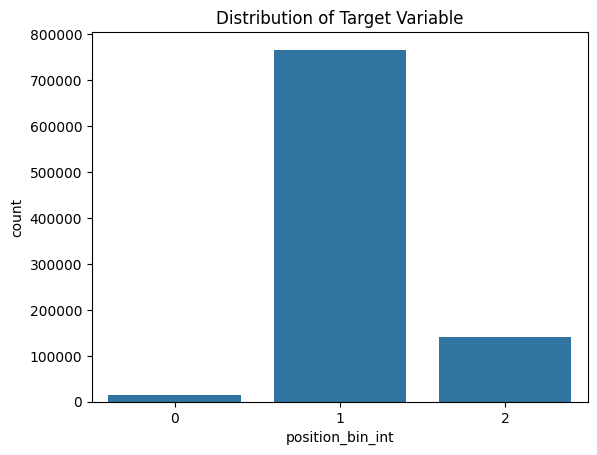

In [63]:
sns.countplot(x='position_bin_int', data=cleaned_df)
plt.title('Distribution of Target Variable')
plt.show()

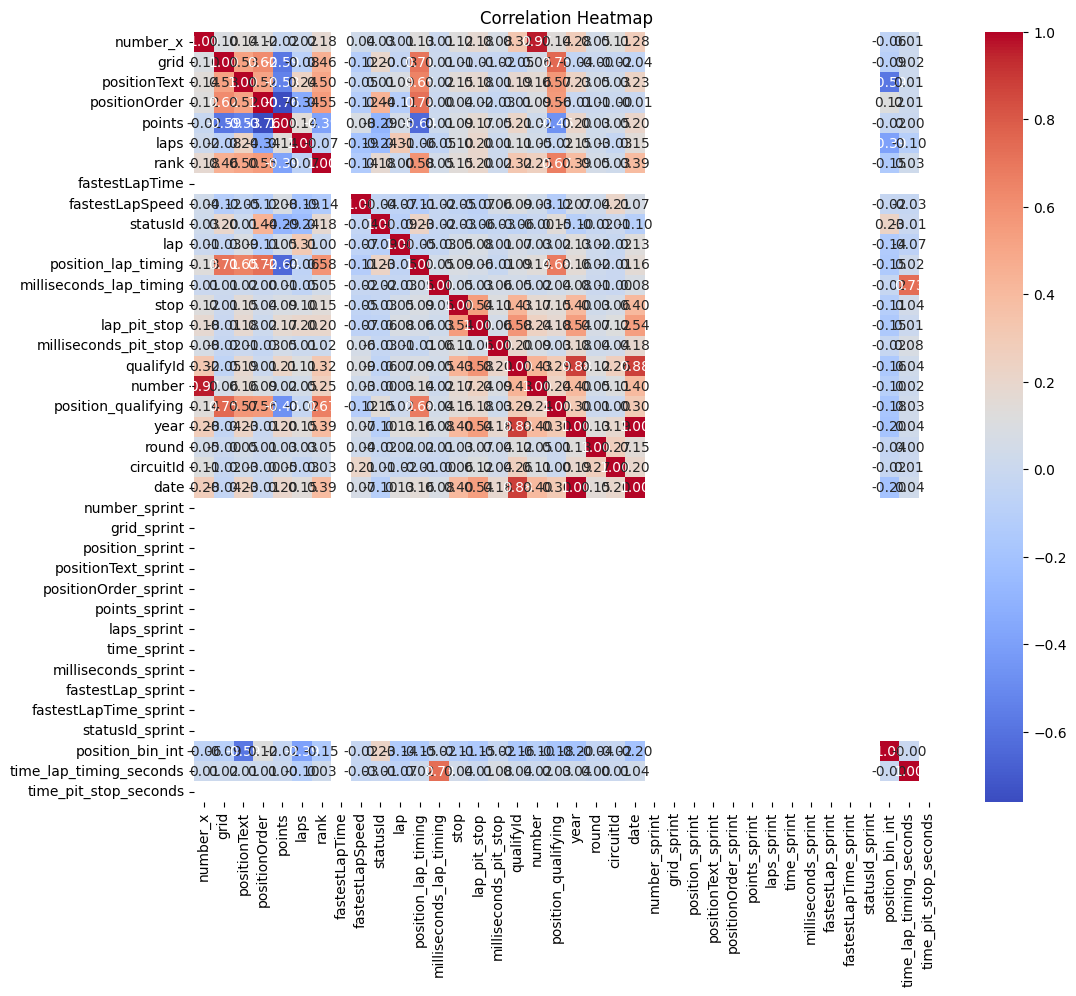

In [64]:
plt.figure(figsize=(12, 10))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

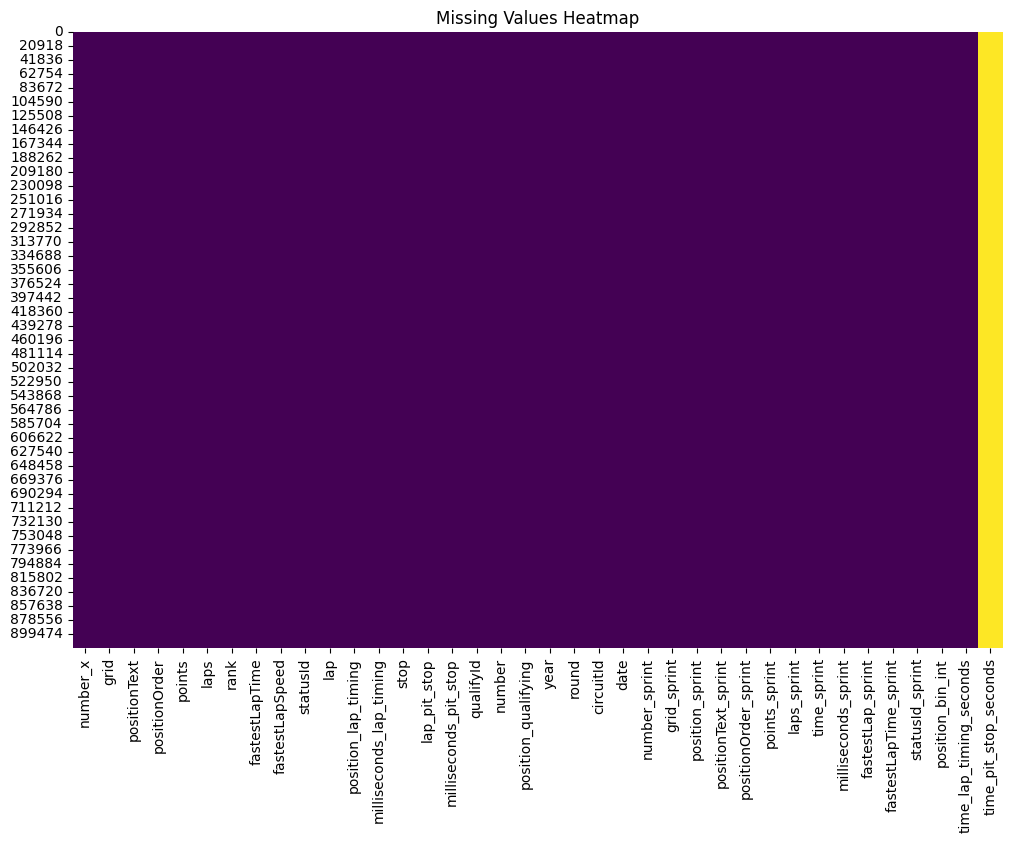

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

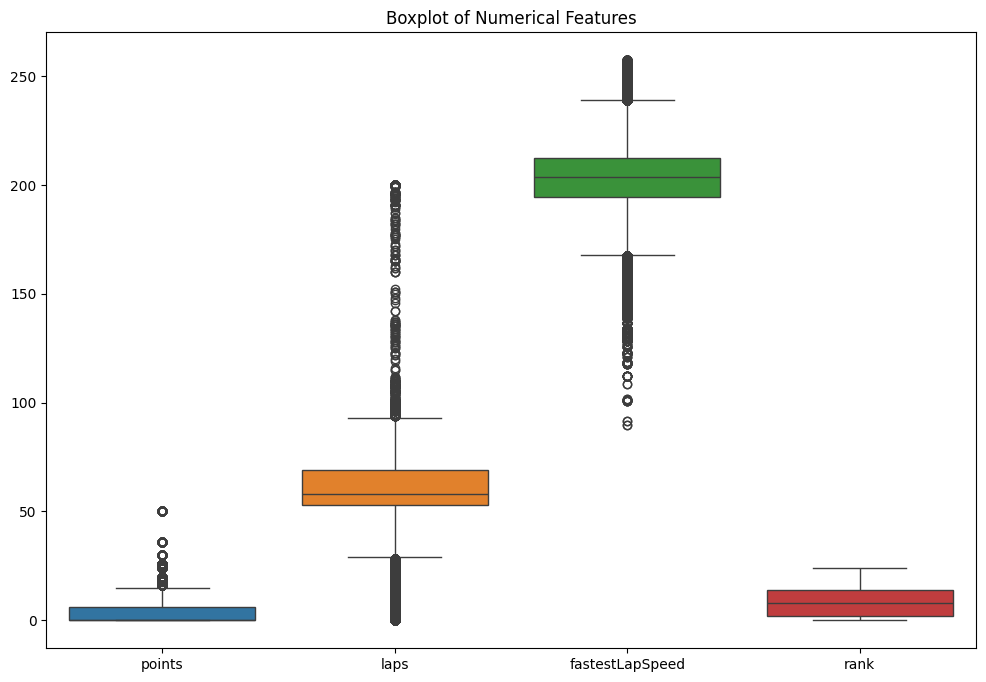

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_df[['points', 'laps', 'fastestLapSpeed', 'rank']])
plt.title('Boxplot of Numerical Features')
plt.show()

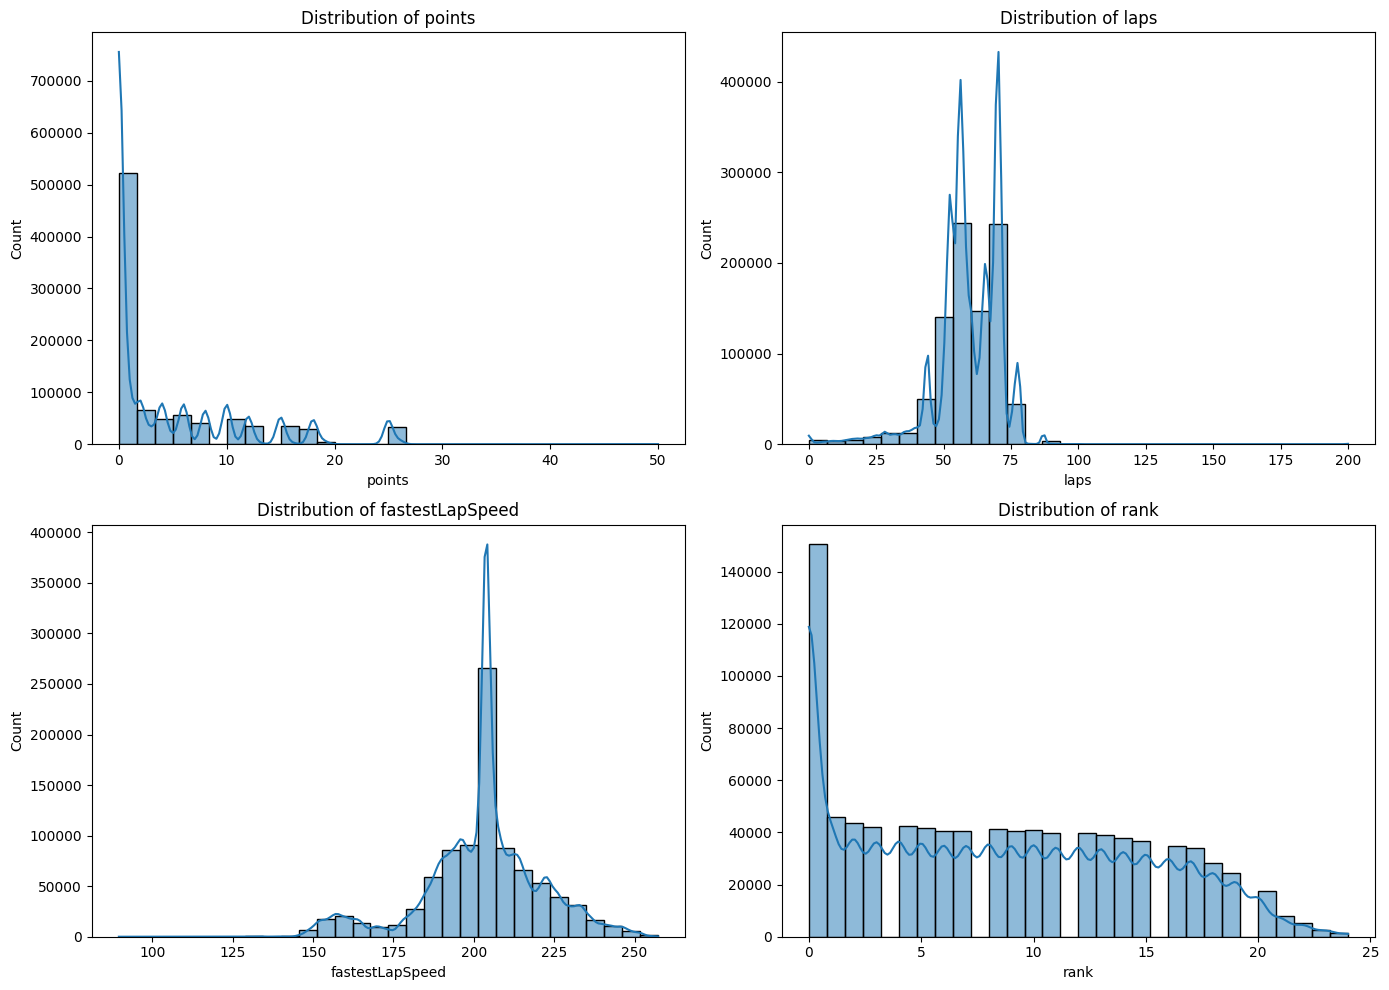

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Features to plot
features = ['points', 'laps', 'fastestLapSpeed', 'rank']

# Clean data: convert inf to NaN and drop missing values
cleaned_df.replace([np.inf, -np.inf], np.nan, inplace=True)
plot_df = cleaned_df.dropna(subset=features)

# Suppress only the FutureWarning temporarily during plotting
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    plt.figure(figsize=(14, 10))
    for i, feature in enumerate(features):
        plt.subplot(2, 2, i + 1)
        sns.histplot(plot_df[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()


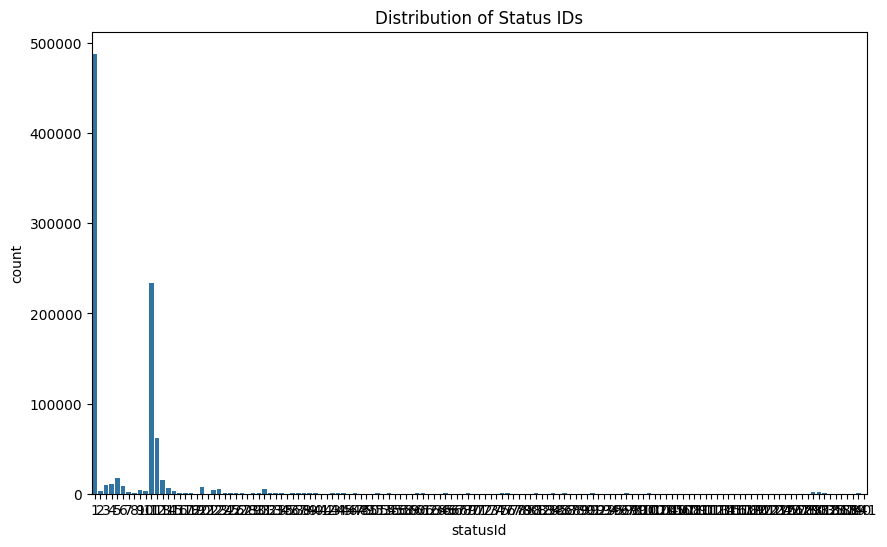

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='statusId', data=cleaned_df)
plt.title('Distribution of Status IDs')
plt.show()

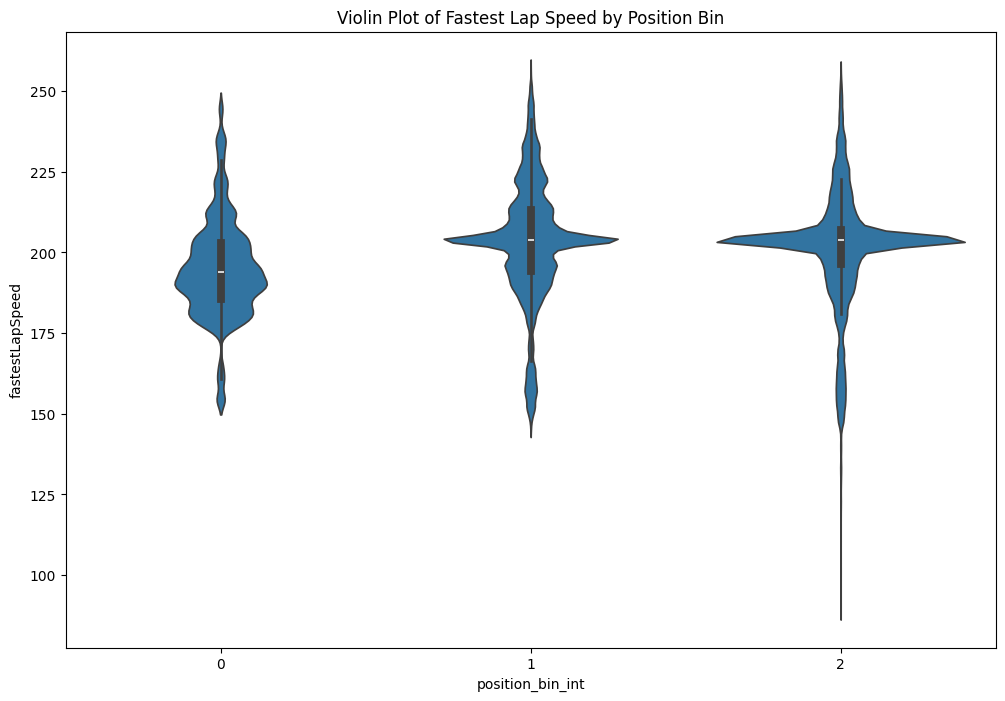

In [69]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='position_bin_int', y='fastestLapSpeed', data=cleaned_df)
plt.title('Violin Plot of Fastest Lap Speed by Position Bin')
plt.show()

## Ensure 'date' column is in datetime format

## Plot time series data

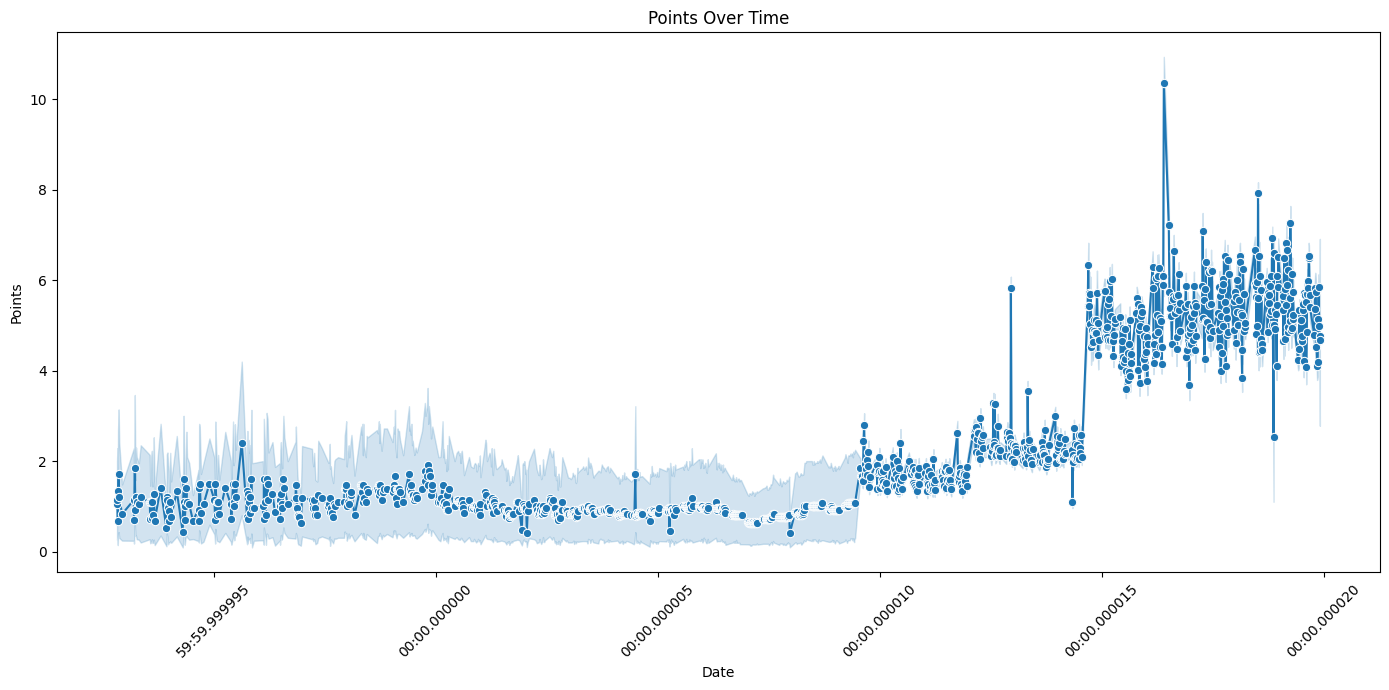

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# Ensure 'date' column exists and convert safely
if 'date' in cleaned_df.columns:
    cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], errors='coerce')

    # Drop rows with missing values
    plot_df = cleaned_df.dropna(subset=['date', 'points'])

    # Suppress Seaborn's FutureWarnings during plotting
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)

        plt.figure(figsize=(14, 7))
        sns.lineplot(x='date', y='points', data=plot_df, marker='o')
        plt.title('Points Over Time')
        plt.xlabel('Date')
        plt.ylabel('Points')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("Column 'date' not found in cleaned_df.")


In [71]:
# Drop the original 'date' column

In [72]:
cleaned_df['year'] = cleaned_df['date'].dt.year
cleaned_df['month'] = cleaned_df['date'].dt.month
cleaned_df['day'] = cleaned_df['date'].dt.day

cleaned_df = cleaned_df.drop(columns=['date'])

In [73]:
X = cleaned_df[['number_x', 'grid', 'positionText', 'positionOrder',
       'points', 'laps', 'rank', 'fastestLapTime', 'fastestLapSpeed',
       'statusId', 'lap', 'position_lap_timing', 'time_lap_timing_seconds',
       'milliseconds_lap_timing', 'stop', 'lap_pit_stop', 'time_pit_stop_seconds',
       'milliseconds_pit_stop', 'qualifyId', 'number', 'position_qualifying',
       'year', 'round', 'circuitId', 'day','month','year', 'number_sprint', 'grid_sprint',
       'position_sprint', 'positionText_sprint', 'positionOrder_sprint',
       'points_sprint', 'laps_sprint', 'time_sprint', 'milliseconds_sprint',
       'fastestLap_sprint', 'fastestLapTime_sprint', 'statusId_sprint']]

y = cleaned_df['position_bin_int']

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [77]:
X_train_scaled

array([[ 0.03153796,  1.4744243 ,  1.34335515, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05237388,  1.31502915, -1.57187531, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3767964 ,  0.51805337,  1.00038686, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.47888   ,  1.31502915,  1.34335515, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08257976,  1.4744243 ,  1.17187101, ...,  0.        ,
         0.        ,  0.        ],
       [-0.52992179, -1.07589819, -1.57187531, ...,  0.        ,
         0.        ,  0.        ]])

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [79]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=101)

In [80]:
y_pred = rf_classifier.predict(X_test_scaled)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3928
           1       1.00      1.00      1.00    230155
           2       1.00      1.00      1.00     42029

    accuracy                           1.00    276112
   macro avg       1.00      1.00      1.00    276112
weighted avg       1.00      1.00      1.00    276112



In [82]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[  3927      1      0]
 [     0 230155      0]
 [     0      0  42029]]


# * Thank You!!!*